In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount("/drive",force_remount=True)

Mounted at /drive


In [3]:
table = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",match='(1950—2019)',attrs={"style":"text-align: right"})

print(table[0].head())


             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [4]:
people = pd.DataFrame(table[0])

print(people)
print(people.shape)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [5]:
people.replace("—",  np.nan, inplace=True)

print(people)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [6]:
columns_to_convert = ["1950","1960","1970","1990","2000","2012","2014", "2019"]

people[columns_to_convert] = people[columns_to_convert].apply(pd.to_numeric)

print(people.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [7]:
missing_percentage = (people.isnull().sum() / len(people)) * 100

print(missing_percentage)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [8]:
people_new=people.drop(27)
print(people_new)


               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [9]:
people_change = people_new.fillna({'1950': people_new['1950'].mean(),'1960': people_new['1960'].mean(),'1970': people_new['1970'].mean(),'2014': people_new['2014'].mean(), '2019': people_new['2019'].mean()})
print(people_change)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

In [10]:
print(people_change['2019'].mean())
print(people_change[people_change['2019'] > people_change['2019'].mean()])

80.17391304347828
               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0


In [11]:
highest_birthrate_2014 = people_change[['Регіон', '2014']].sort_values(by='2014', ascending=False)

region_with_highest_birthrate_2014 = highest_birthrate_2014.iloc[0]

highest_birthrate_region_2014 = region_with_highest_birthrate_2014['Регіон']

print("Регіон з найвищою народжуваністю у 2014 році:", highest_birthrate_region_2014 , "----", region_with_highest_birthrate_2014['2014'])

Регіон з найвищою народжуваністю у 2014 році: Рівненська ---- 148.0


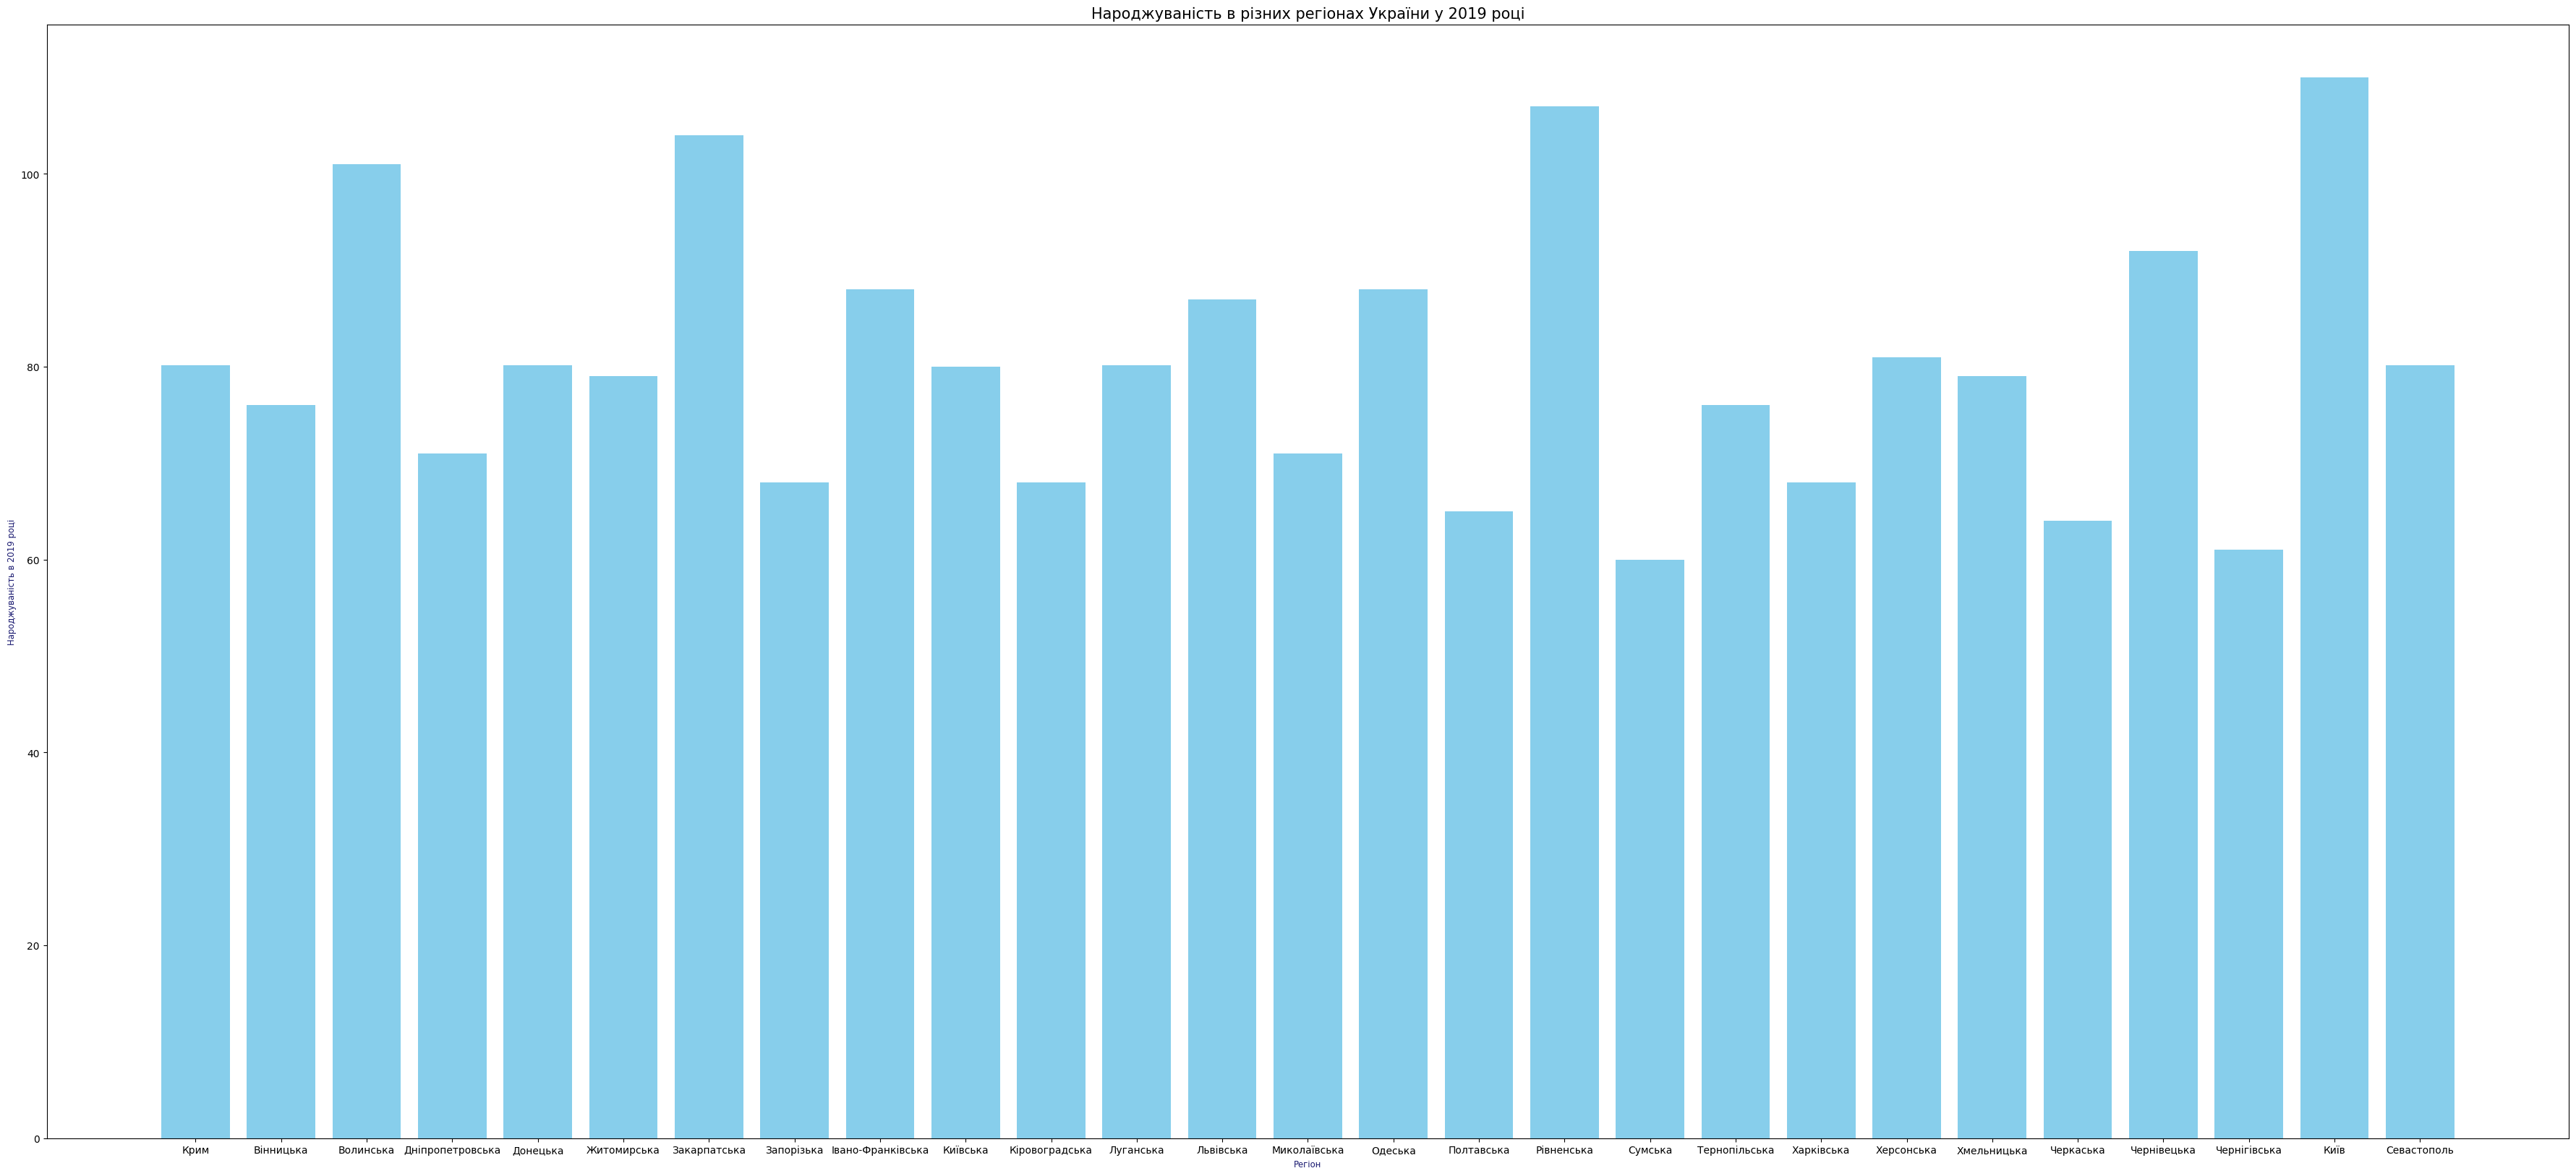

In [12]:
plt.figure(figsize=(45, 20))
plt.bar(
    people_change['Регіон'],people_change['2019'], color='skyblue'
)

plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність в 2019 році", fontsize="small", color="midnightblue")
plt.title("Народжуваність в різних регіонах України у 2019 році", fontsize=15)
plt.show()

In [13]:
%matplotlib inline

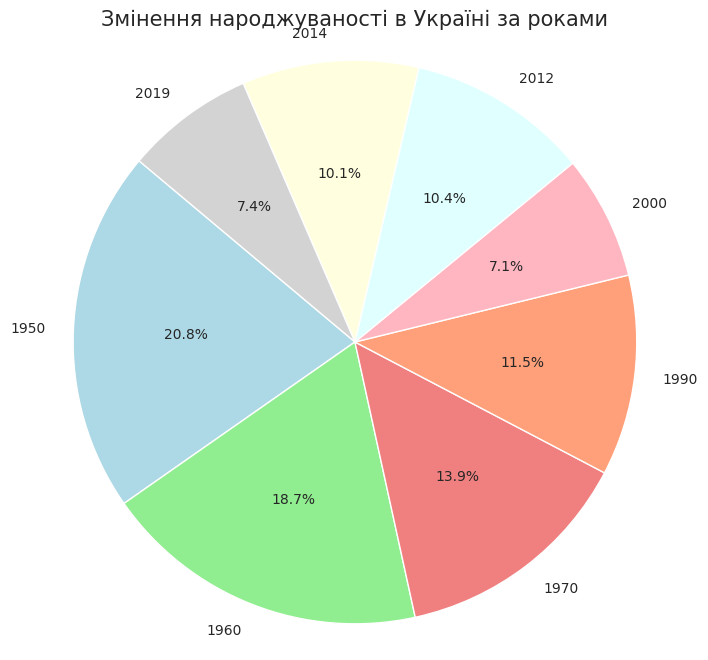

In [22]:
data = people.iloc[27, 1:]
plt.figure(figsize=(8, 8))
plt.pie(data, labels=people.columns[1:], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightcyan', 'lightyellow', 'lightgrey'])

plt.title("Змінення народжуваності в Україні за роками", fontsize=15)
plt.axis('equal')  # Зробіть коло об'ємним
plt.show()

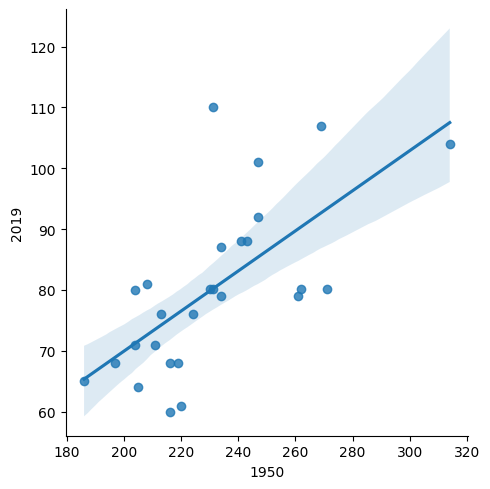

In [18]:
sns.lmplot(x="1950", y="2019", data=people_change)

<Axes: >

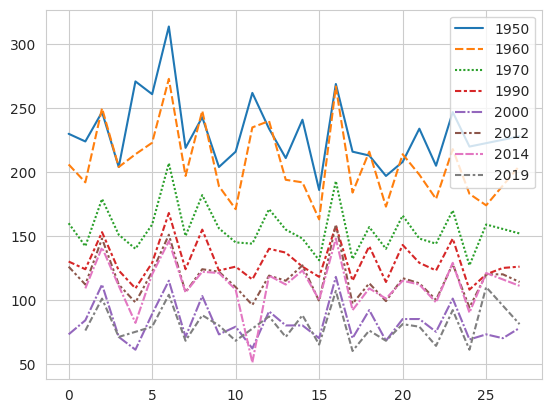

In [26]:
sns.lineplot(data=people)